<a href="https://colab.research.google.com/github/nishithaNsingh/House_Price-Prediction-using-Python_linear_regression/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing dependencies**

In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [85]:
#importing house price dataset

data = sklearn.datasets.fetch_california_housing()

Priniting data


In [86]:
print(data)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [87]:
# as we are loading inbuilt data we cant use data.head()
#first we have to convert it into data frame and then load head

# Convert to a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target column
df['Price'] = data.target

# Display the first few rows
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [88]:
#Checking number of rows and colums
df.shape

(20640, 9)

In [89]:
#checking for null values

df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
Price,0


In [90]:
#statistical measures of data
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


#understanding coorelaion between various features of dataset

1. Positive Correlation
2. Negative Correlation

In [91]:
correlation = df.corr()

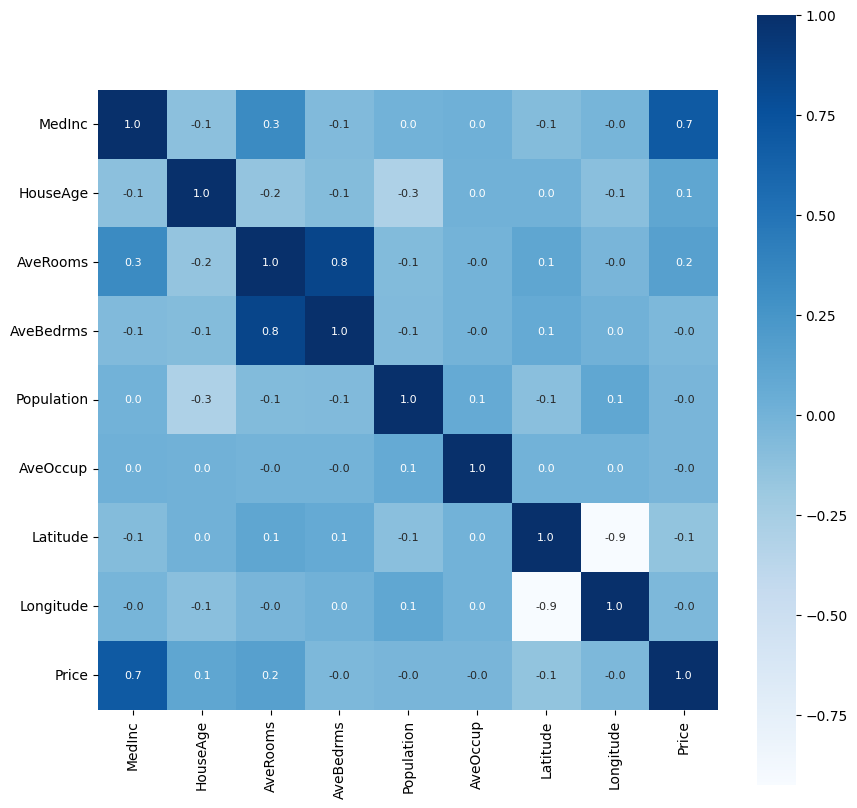

In [92]:
#Constructing heatmap to inderstand correlation

#figsize id size of figeue
plt.figure(figsize=(10,10))

#'correlation' is previous step we are passing as parameter ,
# 'cbar'=ColorBar ,
#'square'=all value to be mentioned in square,
#'fmt'=how many float values after decimal,
#'annot'=annotation size
#cmap = color of map
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')
plt.show()


In [93]:
# Intercept: The predicted house price when all features are zero.
# Coefficients: The effect of each feature on house price. Positive coefficients increase the price, and negative coefficients decrease the price.
# For example, square footage increases the price, while house age reduces the price.

# Get the regression coefficients
coefficients = model.coef_
intercept = model.intercept_
# Output the coefficients
print(f'Intercept: {intercept}')
print(f'Coefficients: {coefficients}')

Intercept: -36.22786909539027
Coefficients: [ 4.41234614e-01  9.33958687e-03 -1.11881257e-01  6.35566324e-01
 -5.55460288e-06 -3.63942002e-03 -4.13791911e-01 -4.26498569e-01]


Splitting the data

In [94]:
X = df.drop(['Price'], axis=1)#Dropping column so axis =1 if it was row axis=0
Y = df['Price']

In [95]:
print(X)


       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [96]:
print(Y)

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Price, Length: 20640, dtype: float64


In [97]:
#splitting data into train and test
#0.2 = 20% of testig data 80% of training data
X_train ,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=2)

In [98]:
print(X.shape,X_train.shape,X_test.shape)

(20640, 8) (18576, 8) (2064, 8)


Model training

In [99]:
#loading the model
model = LinearRegression()

In [100]:
#training the model
model.fit(X_train,Y_train)

LinearRegression()

In [101]:
#Predition
prediction_on_training_data = model.predict(X_train)
print(prediction_on_training_data)

[2.80994195 2.04416067 1.48496895 ... 1.53463222 1.78670003 1.2199845 ]


Evaluation Model

In [102]:
#for testing data
#Predition
prediction_on_testing_data = model.predict(X_test)
print(prediction_on_testing_data)

[2.81424673 1.25006917 1.45367217 ... 3.14362113 2.37874928 1.42452394]


In [103]:
# In regression problems, metrics like MAE, MSE, RMSE, and R² are used to assess the model's performance instead of accuracy.

#Using R² error
score_1 = metrics.r2_score(Y_test,prediction_on_testing_data)


#Mean absolute error
score_2 = metrics.mean_absolute_error(Y_test,prediction_on_testing_data)

#mean square error
score_3 = metrics.mean_squared_error(Y_test,prediction_on_testing_data)

print("R² error : ",score_1)
print("Mean absolute error : ",score_2)
print("mean square error : ",score_3)

R² error :  0.59451263836187
Mean absolute error :  0.5415616522650654
mean square error :  0.5450798947135779


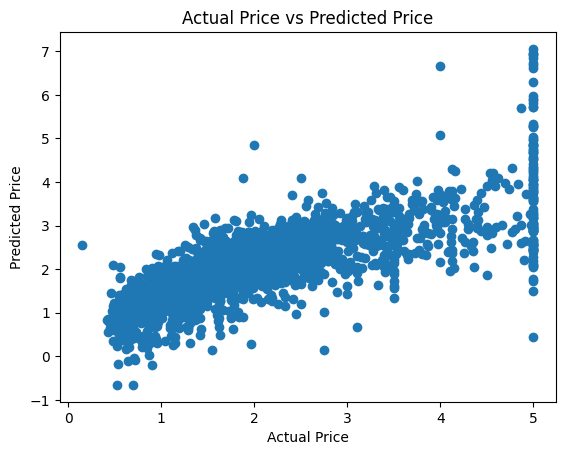

In [104]:
plt.scatter(Y_test,prediction_on_testing_data)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [105]:
# Example input (you need to provide values in the order of the features)
# MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude
input_data = np.array([8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23]).reshape(1, -1)


# Predict the price for the given input
predicted_price = model.predict(input_data)

# Output the predicted price
print(f"Predicted Price: ${predicted_price}")

Predicted Price: $[4.14311978]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
